In [1]:
# Import necessary packages, libraries, and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random

from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('playground-series-s4e8/train.csv')
train_df

id class  cap-diameter cap-shape cap-surface cap-color  \
0              0     e          8.80         f           s         u   
1              1     p          4.51         x           h         o   
2              2     e          6.94         f           s         b   
3              3     e          3.88         f           y         g   
4              4     e          5.85         x           l         w   
...          ...   ...           ...       ...         ...       ...   
3116940  3116940     e          9.29         f         NaN         n   
3116941  3116941     e         10.88         s         NaN         w   
3116942  3116942     p          7.82         x           e         e   
3116943  3116943     e          9.45         p           i         n   
3116944  3116944     p          3.20         x           s         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                          f               a            c          w  ...   
1                          f               a            c          n  ...   
2                          f               x            c          w  ...   
3                          f               s          NaN          g  ...   
4                          f               d          NaN          w  ...   
...                      ...             ...          ...        ...  ...   
3116940                    t             NaN          NaN          w  ...   
3116941                    t               d            c          p  ...   
3116942                    f               a          NaN          w  ...   
3116943                    t               e          NaN          p  ...   
3116944                    f               d            c          w  ...   

         stem-root  stem-surface stem-color veil-type veil-color has-ring  \
0              NaN           NaN          w       NaN        NaN        f   
1              NaN             y          o       NaN        NaN        t   
2              NaN             s          n       NaN        NaN        f   
3              NaN           NaN          w       NaN        NaN        f   
4              NaN           NaN          w       NaN        NaN        f   
...            ...           ...        ...       ...        ...      ...   
3116940          b           NaN          w         u          w        t   
3116941        NaN           NaN          w       NaN        NaN        f   
3116942        NaN           NaN          y       NaN          w        t   
3116943        NaN             y          w       NaN        NaN        t   
3116944        NaN           NaN          w       NaN        NaN        f   

        ring-type spore-print-color habitat season  
0               f               NaN       d      a  
1               z               NaN       d      w  
2               f               NaN       l      w  
3               f               NaN       d      u  
4               f               NaN       g      a  
...           ...               ...     ...    ...  
3116940         g               NaN       d      u  
3116941         f               NaN       d      u  
3116942         z               NaN       d      a  
3116943         p               NaN       d      u  
3116944         f               NaN       g      u  

[3116945 rows x 22 columns]

In [3]:
test_df = pd.read_csv('playground-series-s4e8/test.csv')
test_df

id  cap-diameter cap-shape cap-surface cap-color  \
0        3116945          8.64         x         NaN         n   
1        3116946          6.90         o           t         o   
2        3116947          2.00         b           g         n   
3        3116948          3.47         x           t         n   
4        3116949          6.17         x           h         y   
...          ...           ...       ...         ...       ...   
2077959  5194904          0.88         x           g         w   
2077960  5194905          3.12         x           s         w   
2077961  5194906          5.73         x           e         e   
2077962  5194907          5.03         b           g         n   
2077963  5194908         15.51         f         NaN         w   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                          t             NaN          NaN          w   
1                          f             NaN            c          y   
2                          f             NaN            c          n   
3                          f               s            c          n   
4                          f               p          NaN          y   
...                      ...             ...          ...        ...   
2077959                    f               a            d          w   
2077960                    f               d            c          w   
2077961                    f               a          NaN          w   
2077962                    f               a            d          g   
2077963                    f               d            c          y   

         stem-height  ...  stem-root stem-surface stem-color veil-type  \
0              11.13  ...          b          NaN          w         u   
1               1.27  ...        NaN          NaN          n       NaN   
2               6.18  ...        NaN          NaN          n       NaN   
3               4.98  ...        NaN          NaN          w       NaN   
4               6.73  ...        NaN          NaN          y       NaN   
...              ...  ...        ...          ...        ...       ...   
2077959         2.67  ...        NaN          NaN          e       NaN   
2077960         2.69  ...        NaN          NaN          w       NaN   
2077961         6.16  ...        NaN          NaN          y       NaN   
2077962         6.00  ...        NaN            s          g       NaN   
2077963         2.69  ...        NaN          NaN          w       NaN   

        veil-color has-ring ring-type spore-print-color habitat season  
0                w        t         g               NaN       d      a  
1              NaN        f         f               NaN       d      a  
2              NaN        f         f               NaN       d      s  
3                n        t         z               NaN       d      u  
4                y        t       NaN               NaN       d      u  
...            ...      ...       ...               ...     ...    ...  
2077959        NaN        f         f               NaN       d      u  
2077960        NaN        f         f               NaN       g      a  
2077961          w        t         z               NaN       d      a  
2077962        NaN        f         f               NaN       d      a  
2077963        NaN        f         f               NaN       d      w  

[2077964 rows x 21 columns]

In [4]:
# To check for missing values for all columns in Train_df
train_df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [5]:
# Drop the following 2 columns id and class, id because it's an identifier which is irrelevant, and class because it's the target variable
preprocessed_train_df = train_df.drop(columns=['id', 'class'])
preprocessed_train_df

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0                8.80         f           s         u                    f   
1                4.51         x           h         o                    f   
2                6.94         f           s         b                    f   
3                3.88         f           y         g                    f   
4                5.85         x           l         w                    f   
...               ...       ...         ...       ...                  ...   
3116940          9.29         f         NaN         n                    t   
3116941         10.88         s         NaN         w                    t   
3116942          7.82         x           e         e                    f   
3116943          9.45         p           i         n                    t   
3116944          3.20         x           s         g                    f   

        gill-attachment gill-spacing gill-color  stem-height  stem-width  \
0                     a            c          w         4.51       15.39   
1                     a            c          n         4.79        6.48   
2                     x            c          w         6.85        9.93   
3                     s          NaN          g         4.16        6.53   
4                     d          NaN          w         3.37        8.36   
...                 ...          ...        ...          ...         ...   
3116940             NaN          NaN          w        12.14       18.81   
3116941               d            c          p         6.65       26.97   
3116942               a          NaN          w         9.51       11.06   
3116943               e          NaN          p         9.13       17.77   
3116944               d            c          w         2.82        7.79   

        stem-root stem-surface stem-color veil-type veil-color has-ring  \
0             NaN          NaN          w       NaN        NaN        f   
1             NaN            y          o       NaN        NaN        t   
2             NaN            s          n       NaN        NaN        f   
3             NaN          NaN          w       NaN        NaN        f   
4             NaN          NaN          w       NaN        NaN        f   
...           ...          ...        ...       ...        ...      ...   
3116940         b          NaN          w         u          w        t   
3116941       NaN          NaN          w       NaN        NaN        f   
3116942       NaN          NaN          y       NaN          w        t   
3116943       NaN            y          w       NaN        NaN        t   
3116944       NaN          NaN          w       NaN        NaN        f   

        ring-type spore-print-color habitat season  
0               f               NaN       d      a  
1               z               NaN       d      w  
2               f               NaN       l      w  
3               f               NaN       d      u  
4               f               NaN       g      a  
...           ...               ...     ...    ...  
3116940         g               NaN       d      u  
3116941         f               NaN       d      u  
3116942         z               NaN       d      a  
3116943         p               NaN       d      u  
3116944         f               NaN       g      u  

[3116945 rows x 20 columns]

In [6]:
# Calculate the missing values for each column as a percentage of total rows in train_df
columns = preprocessed_train_df.columns
for column in columns: 
    column_name = column
    missing_values_percentage = (preprocessed_train_df[column].isnull().sum() / preprocessed_train_df.shape[0])
    print(f"Missing values percentage for {column_name.capitalize()} : {missing_values_percentage:.3%}")

Missing values percentage for Cap-diameter : 0.000%
Missing values percentage for Cap-shape : 0.001%
Missing values percentage for Cap-surface : 21.528%
Missing values percentage for Cap-color : 0.000%
Missing values percentage for Does-bruise-or-bleed : 0.000%
Missing values percentage for Gill-attachment : 16.809%
Missing values percentage for Gill-spacing : 40.374%
Missing values percentage for Gill-color : 0.002%
Missing values percentage for Stem-height : 0.000%
Missing values percentage for Stem-width : 0.000%
Missing values percentage for Stem-root : 88.453%
Missing values percentage for Stem-surface : 63.551%
Missing values percentage for Stem-color : 0.001%
Missing values percentage for Veil-type : 94.884%
Missing values percentage for Veil-color : 87.937%
Missing values percentage for Has-ring : 0.001%
Missing values percentage for Ring-type : 4.135%
Missing values percentage for Spore-print-color : 91.425%
Missing values percentage for Habitat : 0.001%
Missing values percent

In [7]:
# Initialise display_value_counts function
def display_value_counts(column, df): 
    column_value_counts  = df[column].value_counts()
    return column_value_counts

In [8]:
# Find the unique values and frequency of occurrences for columns with object dtype in train_df
object_columns = [column for column in columns if preprocessed_train_df[column].dtypes == 'object']
# print (len(object_columns))

# Find how many unique values there are for each feature in train_df
for column in object_columns: 
    print (f"{column.capitalize()} has {preprocessed_train_df[column].nunique()} unique values") 
    # print (f"{column.capitalize()} has {preprocessed_train_df[column].unique()} unique values") 

Cap-shape has 74 unique values
Cap-surface has 83 unique values
Cap-color has 78 unique values
Does-bruise-or-bleed has 26 unique values
Gill-attachment has 78 unique values
Gill-spacing has 48 unique values
Gill-color has 63 unique values
Stem-root has 38 unique values
Stem-surface has 60 unique values
Stem-color has 59 unique values
Veil-type has 22 unique values
Veil-color has 24 unique values
Has-ring has 23 unique values
Ring-type has 40 unique values
Spore-print-color has 32 unique values
Habitat has 52 unique values
Season has 4 unique values


In [9]:
# Filter the dataframe that contains wrong values within 'Does-bruise-or-bleed' column
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['does-bruise-or-bleed'] != 'f') & (preprocessed_train_df['does-bruise-or-bleed'] != 't'))]

# Replace Categorical Feature 'does-bruise-or-bleed' with binary True or False values because this is a boolean
true_percentage = round(preprocessed_train_df[preprocessed_train_df['does-bruise-or-bleed'] == 't'].shape[0] / preprocessed_train_df[(preprocessed_train_df['does-bruise-or-bleed'] == 'f') | (preprocessed_train_df['does-bruise-or-bleed'] == 't')].shape[0] * 100, 3)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['t', 'f'], size=erroneous_values_df.shape[0], p=[true_percentage/100, 1 - true_percentage/100])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'does-bruise-or-bleed'] = random_choices

# Updated Value_Counts() to reflect binary true/false
preprocessed_train_df['does-bruise-or-bleed'].value_counts()


does-bruise-or-bleed
f    2569840
t     547105
Name: count, dtype: int64

In [10]:
preprocessed_train_df['cap-surface'].value_counts() 

cap-surface
t        460777
s        384970
y        327826
h        284460
g        263729
          ...  
1.42          1
has h         1
10.83         1
8.96          1
0.87          1
Name: count, Length: 83, dtype: int64

In [11]:
# Filter the dataframe that contains insignificant values within 'cap-surface' column
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['cap-surface'] != 't') & (preprocessed_train_df['cap-surface'] != 's') & (preprocessed_train_df['cap-surface'] != 'y') & (preprocessed_train_df['cap-surface'] != 'h') & (preprocessed_train_df['cap-surface'] != 'g') & (preprocessed_train_df['cap-surface'] != 'd') &(preprocessed_train_df['cap-surface'] != 'k') & (preprocessed_train_df['cap-surface'] != 'e') & (preprocessed_train_df['cap-surface'] != 'i') & (preprocessed_train_df['cap-surface'] != 'w') & (preprocessed_train_df['cap-surface'] != 'l'))]
percentage_t = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 't'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_s = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 's'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)
percentage_y = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'y'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_h = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'h'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_g = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_d = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'd'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)
percentage_k = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'k'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)  
percentage_e = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)
percentage_i = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'i'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)  
percentage_w = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'w'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_l = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'l'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)

# print (percentage_t, percentage_s, percentage_y, percentage_h, percentage_g, percentage_d, percentage_k, percentage_e, percentage_i, percentage_w, percentage_l) 
# print (percentage_t + percentage_s + percentage_y + percentage_h + percentage_g + percentage_d + percentage_k + percentage_e + percentage_i + percentage_w + percentage_l)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['t', 's', 'y', 'h', 'g', 'd', 'k', 'e', 'i', 'w', 'l'], size=erroneous_values_df.shape[0], p=[percentage_t/100, percentage_s/100, percentage_y/100, percentage_h/100, 
                            percentage_g/100, percentage_d/100, percentage_k/100, percentage_e/100, percentage_i/100, percentage_w/100, (1-(percentage_t/100+percentage_s/100+percentage_y/100+percentage_h/100+ 
                            percentage_g/100+percentage_d/100+percentage_k/100+percentage_e/100+percentage_i/100+percentage_w/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'cap-surface'] = random_choices

# Updated Value_Counts() to reflect downsizing of values within cap-surface feature
preprocessed_train_df['cap-surface'].value_counts()

cap-surface
t    587474
s    490463
y    417927
h    362020
g    336268
d    263877
k    164318
e    152923
i    144380
w    140063
l     57232
Name: count, dtype: int64

In [12]:
# Filter the dataframe that contains wrong values within 'cap-shape' column
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['cap-shape'] != 'x') & (preprocessed_train_df['cap-shape'] != 'f') & (preprocessed_train_df['cap-shape'] != 's') & (preprocessed_train_df['cap-shape'] != 'b') & (preprocessed_train_df['cap-shape'] != 'o') & (preprocessed_train_df['cap-shape'] != 'p') & (preprocessed_train_df['cap-shape'] != 'c'))]

percentage_x = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'x'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_f = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_s = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 's'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_b = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'b'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_o = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'o'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_c = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'c'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)

# print (percentage_x+percentage_f+percentage_s+percentage_b+percentage_o+percentage_p+percentage_c)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['x', 'f', 's', 'b', 'o','p', 'c'], size=erroneous_values_df.shape[0], p=[percentage_x/100, percentage_f/100, percentage_s/100, percentage_b/100, percentage_o/100, percentage_p/100,
                                                (1 - (percentage_x/100+percentage_f/100+percentage_s/100+percentage_b/100+percentage_o/100+percentage_p/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'cap-shape'] = random_choices

# Updated Value_Counts() to reflect binary true/false
print (preprocessed_train_df['cap-shape'].value_counts())
print (preprocessed_train_df['cap-shape'].isnull().sum())


cap-shape
x    1436287
f     676356
s     365209
b     318703
o     108855
p     106988
c     104547
Name: count, dtype: int64
0


In [13]:
# Filter the dataframe that contains wrong values within 'cap-shape' column
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['cap-color'] != 'n') & (preprocessed_train_df['cap-color'] != 'y') & (preprocessed_train_df['cap-color'] != 'w') & (preprocessed_train_df['cap-color'] != 'g') & (preprocessed_train_df['cap-color'] != 'e') & (preprocessed_train_df['cap-color'] != 'o') & (preprocessed_train_df['cap-color'] != 'p') & (preprocessed_train_df['cap-color'] != 'r') &(preprocessed_train_df['cap-color'] != 'u') & (preprocessed_train_df['cap-color'] != 'b') & (preprocessed_train_df['cap-color'] != 'k') & (preprocessed_train_df['cap-color'] != 'l'))]

percentage_n = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'n'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_y = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'y'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_w = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'w'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_g = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_e = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_o = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'o'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_r = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'r'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_u = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'u'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_b = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'b'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_k = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'k'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_l = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'l'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)

# print (percentage_n, percentage_y, percentage_w, percentage_g, percentage_e, percentage_o, percentage_p, percentage_r, percentage_u, percentage_b, percentage_k, percentage_l) 
# print (percentage_n + percentage_y + percentage_w + percentage_g + percentage_e + percentage_o + percentage_p + percentage_r + percentage_u + percentage_b + percentage_k + percentage_l)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['n', 'y', 'w', 'g', 'e', 'o','p', 'r', 'u', 'b', 'k', 'l'], size=erroneous_values_df.shape[0], p=[percentage_n/100, percentage_y/100, percentage_w/100, percentage_g/100, percentage_e/100, percentage_o/100, percentage_p/100, percentage_r/100, percentage_u/100, percentage_b/100, percentage_k/100,
                                (1 - (percentage_n/100 + percentage_y/100 + percentage_w/100 + percentage_g/100 + percentage_e/100 + percentage_o/100 + percentage_p/100 + percentage_r/100 + percentage_u/100 + percentage_b/100 + percentage_k/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'cap-color'] = random_choices

# Updated Value_Counts() to reflect binary true/false
print (preprocessed_train_df['cap-color'].value_counts())
print (preprocessed_train_df['cap-color'].isnull().sum())


cap-color
n    1359710
y     386679
w     379487
g     210853
e     197307
o     178868
p      91847
r      78239
u      73180
b      61321
k      59894
l      39560
Name: count, dtype: int64
0


In [27]:
# Filter the dataframe that contains wrong values within 'gill-attachment' column
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['gill-attachment'] != 'a') & (preprocessed_train_df['gill-attachment'] != 'd') & (preprocessed_train_df['gill-attachment'] != 'x') & (preprocessed_train_df['gill-attachment'] != 'e') & (preprocessed_train_df['gill-attachment'] != 's') & (preprocessed_train_df['gill-attachment'] != 'p') & (preprocessed_train_df['gill-attachment'] != 'f'))]

percentage_a = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'a'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_d = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'd'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_x = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'x'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_e = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_s = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 's'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)

# print (percentage_a+percentage_d+percentage_x+percentage_e+percentage_s+percentage_p+percentage_f)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['a', 'd', 'x', 'e', 's','p', 'f'], size=erroneous_values_df.shape[0], p=[percentage_a/100, percentage_d/100, percentage_x/100, percentage_e/100, percentage_s/100, percentage_p/100,
                                                (1 - (percentage_a/100+percentage_d/100+percentage_x/100+percentage_e/100+percentage_s/100+percentage_p/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'gill-attachment'] = random_choices

# Updated Value_Counts() to reflect binary true/false
print (preprocessed_train_df['gill-attachment'].value_counts())
print (preprocessed_train_df['gill-attachment'].isnull().sum())


gill-attachment
a    776640
d    708747
x    433853
e    362826
s    355350
p    335197
f    144332
Name: count, dtype: int64
0


In [14]:
for column in object_columns: 
    print (f"---- {column} ----")
    display(display_value_counts(column, preprocessed_train_df).to_frame())
    pd.set_option('display.max_rows', False)


---- cap-shape ----


count
cap-shape         
x          1436287
f           676356
s           365209
b           318703
o           108855
p           106988
c           104547

---- cap-surface ----


count
cap-surface        
t            587474
s            490463
y            417927
h            362020
g            336268
d            263877
k            164318
e            152923
i            144380
w            140063
l             57232

---- cap-color ----


count
cap-color         
n          1359710
y           386679
w           379487
g           210853
e           197307
o           178868
p            91847
r            78239
u            73180
b            61321
k            59894
l            39560

---- does-bruise-or-bleed ----


count
does-bruise-or-bleed         
f                     2569840
t                      547105

---- gill-attachment ----


count
gill-attachment        
a                646034
d                589236
x                360878
e                301858
s                295439
p                279110
f                119953
c                    74
u                    56
...                 ...
does                  1
10.23                 1
6.74                  1
0.92                  1
1                     1
is a                  1
3.71                  1
50.44                 1
13.94                 1

[78 rows x 1 columns]

---- gill-spacing ----


count
gill-spacing         
c             1331054
d              407932
f              119380
e                  24
a                  17
s                  16
b                  12
x                   8
t                   8
...               ...
4.04                1
5.22                1
3.92                1
9.01                1
class               1
4.8                 1
2.69                1
3.61                1
55.13               1

[48 rows x 1 columns]

---- gill-color ----


count
gill-color        
w           931538
n           543386
y           469464
p           343626
g           212164
o           157119
k           127970
f           119694
r            62799
...            ...
8.06             1
stem-root        1
6.19             1
4.49             1
9.46             1
5.01             1
3.4              1
17               1
8.37             1

[63 rows x 1 columns]

---- stem-root ----


count
stem-root        
b          165801
s          116946
r           47803
c           28592
f             597
d              24
y              14
g              12
w              12
...           ...
1.48            1
3.23            1
15.69           1
16.88           1
5.59            1
2.77            1
20.01           1
3.63            1
7.15            1

[38 rows x 1 columns]

---- stem-surface ----


count
stem-surface        
s             327610
y             255500
i             224346
t             147974
g              78080
k              73383
h              28283
f                512
w                 49
...              ...
3.68               1
5.97               1
1.59               1
25.83              1
3.89               1
4.34               1
6.58               1
12.04              1
13.94              1

[60 rows x 1 columns]

---- stem-color ----


count
stem-color         
w           1196637
n           1003464
y            373971
g            132019
o            111541
e            103373
u             67017
p             54690
k             33676
...             ...
is w              1
8.32              1
23.59             1
2.78              1
3.13              1
33.52             1
7.33              1
1.75              1
4.33              1

[59 rows x 1 columns]

---- veil-type ----


count
veil-type        
u          159373
w              11
a               9
f               8
e               8
b               5
c               5
y               4
k               4
...           ...
d               2
p               2
h               2
i               2
l               1
is None         1
t               1
21.11           1
5.94            1

[22 rows x 1 columns]

---- veil-color ----


count
veil-color        
w           279070
y            30473
n            30039
u            14026
k            13080
e             9169
g               30
p               23
r               14
...            ...
h                5
c                4
f                4
l                4
b                3
z                1
8.25             1
2.49             1
3.32             1

[24 rows x 1 columns]

---- has-ring ----


count
has-ring           
f           2368820
t            747982
r                16
h                13
c                11
l                11
s                11
p                11
g                 8
...             ...
d                 3
k                 2
o                 2
n                 2
f has-ring        1
i                 1
10.3              1
w                 1
a                 1

[23 rows x 1 columns]

---- ring-type ----


count
ring-type                    
f                     2477170
e                      120006
z                      113780
l                       73443
r                       67909
p                       67678
g                       63687
m                        3992
t                          98
...                       ...
spore-print-color           1
2                           1
11                          1
1                           1
23.6                        1
4                           1
does-bruise-or-bleed        1
3.12                        1
8.25                        1

[40 rows x 1 columns]

---- spore-print-color ----


count
spore-print-color        
k                  107310
p                   68237
w                   50173
n                   22646
r                    7975
u                    7256
g                    3492
y                      36
s                      21
...                   ...
10 None                 1
9 None                  1
2.49                    1
class                   1
2.62                    1
season                  1
9.55                    1
6.36                    1
4.58                    1

[32 rows x 1 columns]

---- habitat ----


count
habitat                      
d                     2177573
g                      454908
l                      171892
m                      150969
h                      120137
w                       18530
p                       17180
u                        5264
e                          55
...                       ...
5.56                        1
is h                        1
4                           1
2.94                        1
does-bruise-or-bleed        1
9.28                        1
17.1                        1
8.09                        1
2.25                        1

[52 rows x 1 columns]

---- season ----


count
season         
a       1543321
u       1153588
w        278189
s        141847

In [15]:
# Retrieve the columns which are of non-object datatype
non_object_columns = [col for col in preprocessed_train_df.columns if not preprocessed_train_df[col].dtypes == 'object']

# Fill Missing Values (4) for cap-diameter via median of cap-diameter values
preprocessed_train_df['cap-diameter'] = preprocessed_train_df['cap-diameter'].fillna(value=preprocessed_train_df['cap-diameter'].median())
preprocessed_train_df[non_object_columns].isnull().sum()

cap-diameter    0
stem-height     0
stem-width      0
dtype: int64

In [16]:
# Current Skewness for Non-Object Columns without any scaling/transformation applied
preprocessed_train_df[non_object_columns].skew() 

cap-diameter    3.972612
stem-height     1.926682
stem-width      1.235427
dtype: float64

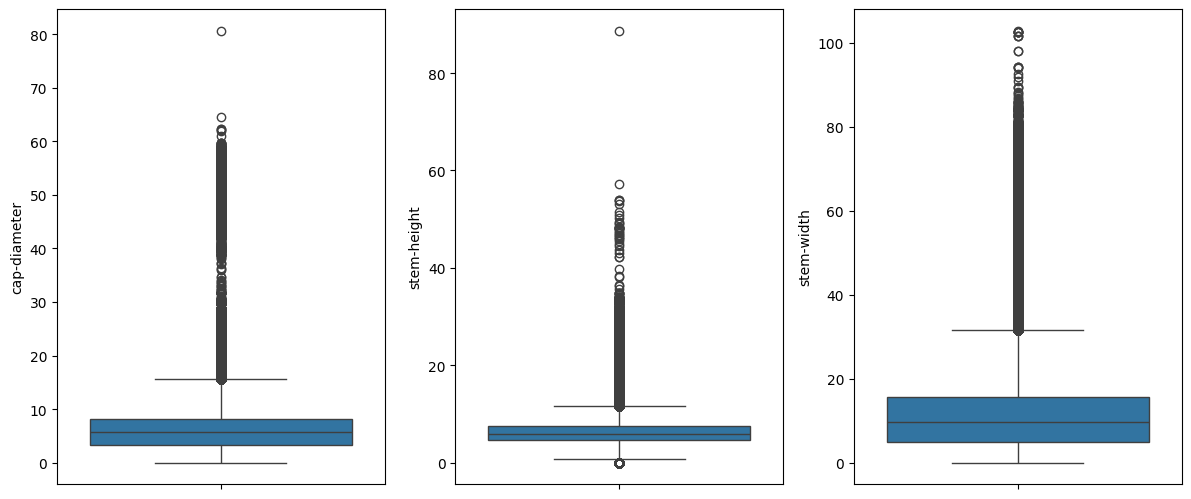

In [17]:
# Visualise Non-Object Columns as Boxplots
plt.figure(figsize=(16,10))
for i, col in enumerate(non_object_columns):
        plt.subplot(2,4,i + 1)
        sns.boxplot(y=col, data=preprocessed_train_df)
        #plt.ylabel('')

plt.tight_layout()

plt.show()

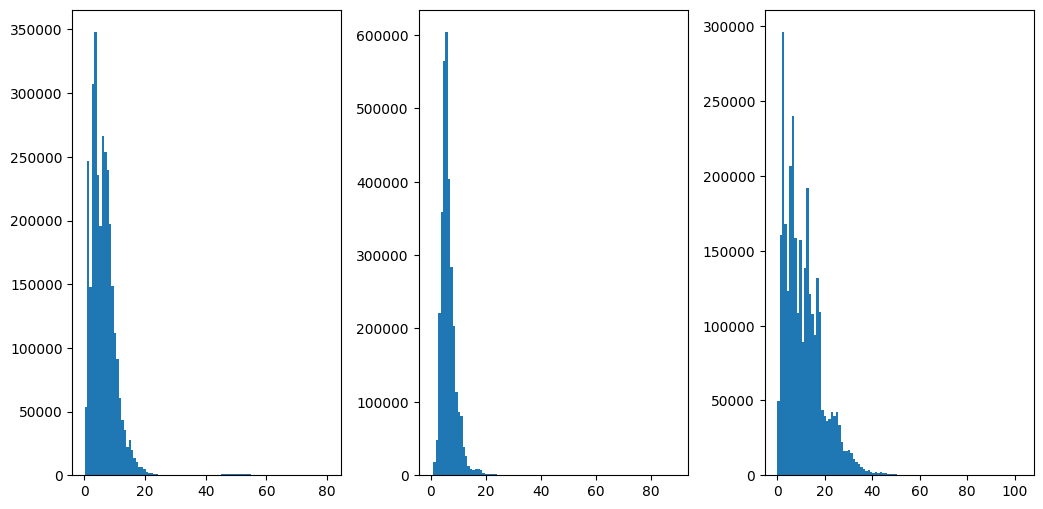

In [18]:
# Visualise Non-Object Columns as Histograms
plt.figure(figsize=(14,10))
for i, col in enumerate(non_object_columns):
        plt.subplot(2,4,i + 1)
        plt.hist(preprocessed_train_df[col], bins=100)
        #plt.ylabel('')

plt.tight_layout()
# Results clearly show that all 3 non-object columns are right-skewed, hence transformation is required
plt.show()

In [19]:
# Function to implement Interquartile-Range to identify outliers present (if any)
def IQR_Outliers (X, features):

    print('# of features: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    #print(indices)
    print('Total number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
        #Use nanpercentile instead of percentile if there are NAN values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        print('Outliers Index: ', outliers_index)
        print('Outliers: ', outliers)
        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nTotal number of rows with outliers: ', len(out_indexlist))
    print('List of rows with outliers: ', out_indexlist)
    
    
IQR_Outliers(preprocessed_train_df, non_object_columns)

# of features:  3
Features:  ['cap-diameter', 'stem-height', 'stem-width']
Total number of samples:  3116945

Feature:  cap-diameter
Upper and Lower limits:  15.620000000000001 -4.0600000000000005
Number of outliers:  76124
Outliers Index:  [93, 153, 252, 342, 392, 423, 457, 486, 550, 626, 675, 693, 700, 727, 749, 767, 787, 904, 919, 964, 996, 1009, 1051, 1066, 1100, 1198, 1226, 1258, 1272, 1313, 1428, 1464, 1495, 1509, 1587, 1624, 1740, 1785, 1932, 1957, 2002, 2012, 2016, 2072, 2086, 2132, 2180, 2186, 2189, 2281, 2302, 2360, 2369, 2393, 2453, 2471, 2534, 2568, 2685, 2693, 2696, 2710, 2864, 2906, 2927, 2990, 2993, 3026, 3028, 3033, 3073, 3148, 3229, 3232, 3249, 3321, 3403, 3409, 3437, 3451, 3453, 3493, 3522, 3523, 3553, 3592, 3607, 3634, 3648, 3661, 3687, 3702, 3744, 3753, 3778, 3791, 3928, 4004, 4024, 4031, 4063, 4079, 4136, 4174, 4292, 4299, 4326, 4435, 4491, 4508, 4527, 4543, 4599, 4602, 4606, 4745, 4795, 4842, 4879, 5057, 5067, 5094, 5121, 5203, 5266, 5275, 5277, 5296, 5299, 5330, 

In [20]:
# Sqrt function created to transform non-object columns
def sqrt_transformation (features, df): 
    for feature in features: 
        df[f"sqrt_{feature}"] = np.sqrt(df[feature])
        df = df.drop(columns=[f"{feature}"])
    return df 

In [21]:
# Applying Sqrt transformation to non-object columns
Non_object_transformed_train_df = sqrt_transformation(non_object_columns, preprocessed_train_df)
transformed_non_object_columns = [col for col in Non_object_transformed_train_df.columns if Non_object_transformed_train_df[col].dtypes != 'object']

# Current Skewness for Non-Object columns after applying Sqrt transformation
Non_object_transformed_train_df[transformed_non_object_columns].skew() 

sqrt_cap-diameter    0.903853
sqrt_stem-height     0.868055
sqrt_stem-width      0.296952
dtype: float64

In [22]:
Non_object_transformed_train_df.isnull().sum() 

cap-shape                     0
cap-surface                   0
cap-color                     0
does-bruise-or-bleed          0
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
sqrt_cap-diameter             0
sqrt_stem-height              0
sqrt_stem-width               0
dtype: int64